In [3]:
import torch
import numpy as np
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from load_LIDC_data import LIDC_IDRI
from probabilistic_unet import ProbabilisticUnet
from utils import l2_regularisation
from save_load_net import save_model, load_model


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dataset = LIDC_IDRI(dataset_location = 'data/')
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(0.1 * dataset_size))
np.random.shuffle(indices)
train_indices, test_indices = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

train_loader = DataLoader(dataset, batch_size=5, sampler=train_sampler)
test_loader = DataLoader(dataset, batch_size=1, sampler=test_sampler)
print("Number of training/test patches:", (len(train_indices),len(test_indices)))

# 加载已经训练好的网络进行预测
model = ProbabilisticUnet(input_channels=1, num_classes=1, num_filters=[32,64,128,192], latent_dim=2, no_convs_fcomb=4, beta=10.0)
net = load_model(model=model, path='model/unet.pt', device=device)

optimizer = torch.optim.Adam(net.parameters(), lr=1e-4, weight_decay=0)


Loading file data_lidc.pickle
Number of training/test patches: (27173, 3019)


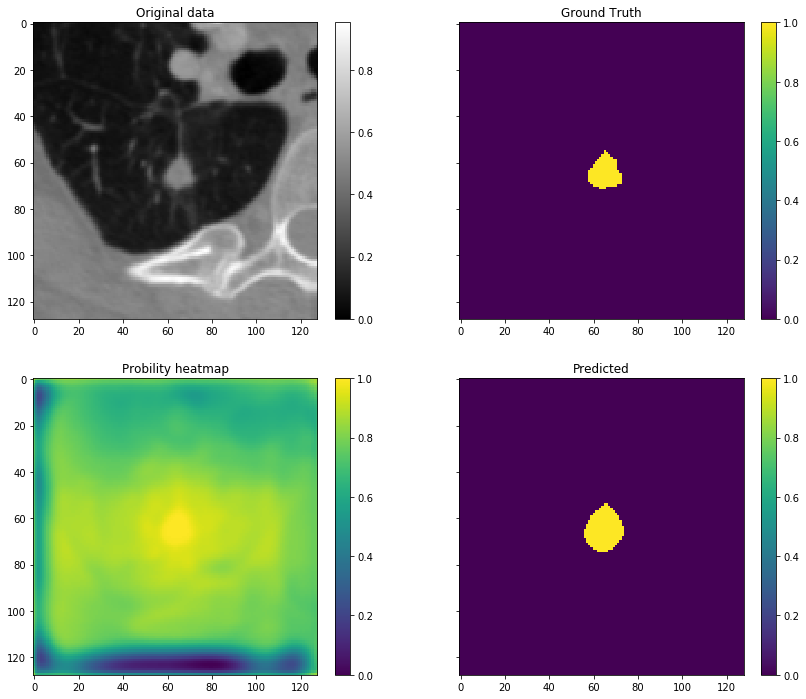

In [73]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

for step, (patch, mask, _) in enumerate(test_loader): 
    if step == 0:
        ## show the image
        label_np = mask.numpy()[0]
        image_np = patch.numpy()[0][0]

        ## through the net to predict
        patch = patch.to(device)
        mask = mask.to(device)
        mask = torch.unsqueeze(mask,1)
        net.forward(patch, None, training=False)
        result = net.sample(testing=True).cpu()[0][0]

        ## show the image
        fig, ax = plt.subplots(2,2, sharey=True, figsize=(14,12))
        result_np = result.detach().numpy()   
        
        index = np.unravel_index(result_np.argmax(), result_np.shape)
        max_value = result_np[index[0]][index[1]]
        index = np.unravel_index(result_np.argmin(), result_np.shape)
        min_value = result_np[index[0]][index[1]]
        result_np = (result_np - min_value)/(max_value-min_value)
        
        threshold = 0.95
        result_binary = result_np.copy()
        result_binary[ result_binary>=threshold ] = 1
        result_binary[ result_binary< threshold ] = 0
        
        ax[0][0].set_title("Original data")
        ax[0][1].set_title("Ground Truth")
        ax[1][0].set_title("Probility heatmap")
        ax[1][1].set_title("Predicted")
        
        ax00 = ax[0][0].imshow(image_np, aspect="auto", cmap="gray")
        ax01 = ax[0][1].imshow(label_np, aspect="auto")
        ax10 = ax[1][0].imshow(result_np, aspect="auto")
        ax11 = ax[1][1].imshow(result_binary, aspect="auto")
        
        fig.colorbar(ax00, ax=ax[0][0])
        fig.colorbar(ax01, ax=ax[0][1])
        fig.colorbar(ax10, ax=ax[1][0])
        fig.colorbar(ax11, ax=ax[1][1])

In [74]:
import torch
import numpy as np
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from load_LIDC_data import LIDC_IDRI
from probabilistic_unet import ProbabilisticUnet
from utils import l2_regularisation
from save_load_net import save_model, load_model


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dataset = LIDC_IDRI(dataset_location = 'data/')
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(0.1 * dataset_size))
np.random.shuffle(indices)
train_indices, test_indices = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

train_loader = DataLoader(dataset, batch_size=5, sampler=train_sampler)
test_loader = DataLoader(dataset, batch_size=1, sampler=test_sampler)
print("Number of training/test patches:", (len(train_indices),len(test_indices)))

# 加载已经训练好的网络进行预测
model = ProbabilisticUnet(input_channels=1, num_classes=1, num_filters=[32,64,128,192], latent_dim=2, no_convs_fcomb=4, beta=10.0)
net = load_model(model=model, path='model/unet_1.pt', device=device)

optimizer = torch.optim.Adam(net.parameters(), lr=1e-4, weight_decay=0)


Loading file data_lidc.pickle
Number of training/test patches: (40760, 4528)


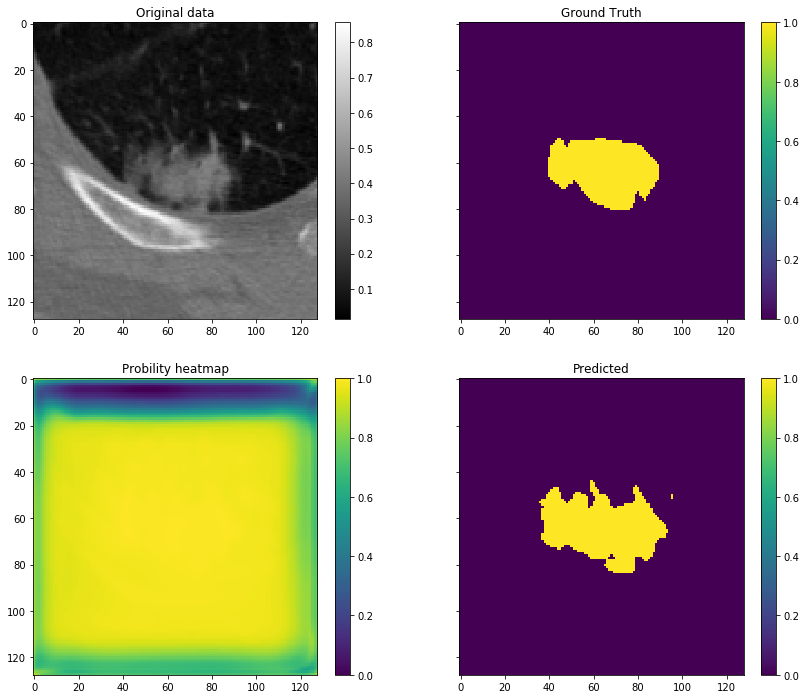

In [96]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

for step, (patch, mask, _) in enumerate(test_loader): 
    if step == 0:
        ## show the image
        label_np = mask.numpy()[0]
        image_np = patch.numpy()[0][0]

        ## through the net to predict
        patch = patch.to(device)
        mask = mask.to(device)
        mask = torch.unsqueeze(mask,1)
        net.forward(patch, None, training=False)
        result = net.sample(testing=True).cpu()[0][0]

        ## show the image
        fig, ax = plt.subplots(2,2, sharey=True, figsize=(14,12))
        result_np = result.detach().numpy()   
        
        index = np.unravel_index(result_np.argmax(), result_np.shape)
        max_value = result_np[index[0]][index[1]]
        index = np.unravel_index(result_np.argmin(), result_np.shape)
        min_value = result_np[index[0]][index[1]]
        result_np = (result_np - min_value)/(max_value-min_value)
        
        threshold = 0.99
        result_binary = result_np.copy()
        result_binary[ result_binary>=threshold ] = 1
        result_binary[ result_binary< threshold ] = 0
        
        ax[0][0].set_title("Original data")
        ax[0][1].set_title("Ground Truth")
        ax[1][0].set_title("Probility heatmap")
        ax[1][1].set_title("Predicted")
        
        ax00 = ax[0][0].imshow(image_np, aspect="auto", cmap="gray")
        ax01 = ax[0][1].imshow(label_np, aspect="auto")
        ax10 = ax[1][0].imshow(result_np, aspect="auto")
        ax11 = ax[1][1].imshow(result_binary, aspect="auto")
        
        fig.colorbar(ax00, ax=ax[0][0])
        fig.colorbar(ax01, ax=ax[0][1])
        fig.colorbar(ax10, ax=ax[1][0])
        fig.colorbar(ax11, ax=ax[1][1])

In [4]:
import torch
from probabilistic_unet import ProbabilisticUnet

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# 加载已经训练好的网络进行预测
model = ProbabilisticUnet(input_channels=1, num_classes=1, num_filters=[32,64,128,192], latent_dim=2, no_convs_fcomb=4, beta=10.0)
net = load_model(model=model, path='model/unet.pt', device=device)

net

ProbabilisticUnet(
  (unet): Unet(
    (contracting_path): ModuleList(
      (0): DownConvBlock(
        (layers): Sequential(
          (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): ReLU(inplace)
          (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (3): ReLU(inplace)
          (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (5): ReLU(inplace)
        )
      )
      (1): DownConvBlock(
        (layers): Sequential(
          (0): AvgPool2d(kernel_size=2, stride=2, padding=0)
          (1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (2): ReLU(inplace)
          (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): ReLU(inplace)
          (5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (6): ReLU(inplace)
        )
      )
      (2): DownConvBlock(
        (layers): Sequential(
     

In [5]:
import torch
import numpy as np
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from load_LIDC_data import LIDC_IDRI
from probabilistic_unet import ProbabilisticUnet
from utils import l2_regularisation
from save_load_net import save_model, load_model


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dataset = LIDC_IDRI(dataset_location = 'data/')
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(0.1 * dataset_size))
np.random.shuffle(indices)
train_indices, test_indices = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

train_loader = DataLoader(dataset, batch_size=5, sampler=train_sampler)
test_loader = DataLoader(dataset, batch_size=1, sampler=test_sampler)
print("Number of training/test patches:", (len(train_indices),len(test_indices)))

# 加载已经训练好的网络进行预测
model = ProbabilisticUnet(input_channels=1, num_classes=1, num_filters=[32,64,128,192], latent_dim=2, no_convs_fcomb=4, beta=10.0)
net = load_model(model=model, path='model/unet.pt', device=device)

optimizer = torch.optim.Adam(net.parameters(), lr=1e-4, weight_decay=0)


Loading file data_lidc.pickle
Number of training/test patches: (27173, 3019)


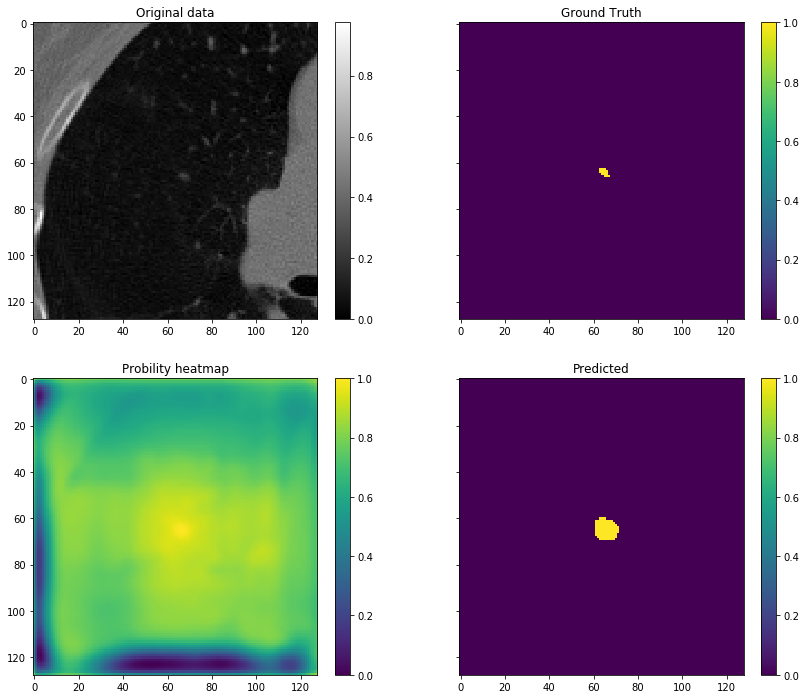

In [12]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

for step, (patch, mask, _) in enumerate(test_loader): 
    if step == 0:
        ## show the image
        label_np = mask.numpy()[0]
        image_np = patch.numpy()[0][0]

        ## through the net to predict
        patch = patch.to(device)
        mask = mask.to(device)
        mask = torch.unsqueeze(mask,1)
        net.forward(patch, None, training=False)
        result = net.sample(testing=True).cpu()[0][0]

        ## show the image
        fig, ax = plt.subplots(2,2, sharey=True, figsize=(14,12))
        result_np = result.detach().numpy()   
        
        index = np.unravel_index(result_np.argmax(), result_np.shape)
        max_value = result_np[index[0]][index[1]]
        index = np.unravel_index(result_np.argmin(), result_np.shape)
        min_value = result_np[index[0]][index[1]]
        result_np = (result_np - min_value)/(max_value-min_value)
        
        threshold = 0.95
        result_binary = result_np.copy()
        result_binary[ result_binary>=threshold ] = 1
        result_binary[ result_binary< threshold ] = 0
        
        ax[0][0].set_title("Original data")
        ax[0][1].set_title("Ground Truth")
        ax[1][0].set_title("Probility heatmap")
        ax[1][1].set_title("Predicted")
        
        ax00 = ax[0][0].imshow(image_np, aspect="auto", cmap="gray")
        ax01 = ax[0][1].imshow(label_np, aspect="auto")
        ax10 = ax[1][0].imshow(result_np, aspect="auto")
        ax11 = ax[1][1].imshow(result_binary, aspect="auto")
        
        fig.colorbar(ax00, ax=ax[0][0])
        fig.colorbar(ax01, ax=ax[0][1])
        fig.colorbar(ax10, ax=ax[1][0])
        fig.colorbar(ax11, ax=ax[1][1])